# Daten einlesen

## Notwendige Bibliotheken importieren

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats

## Daten laden und in DataFrame verbinden

In [3]:
# Download Data
umsatzdaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/umsatzdaten_gekuerzt.csv"

kiwodaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/kiwo.csv"

wetterdaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/wetter.csv"

# Daten von den URLs herunterladen und in Pandas DataFrames laden
umsatzdaten = pd.read_csv(umsatzdaten_url)
kiwo = pd.read_csv(kiwodaten_url)
wetter = pd.read_csv(wetterdaten_url)

#Outer Join
merged_data = pd.merge(umsatzdaten, kiwo, on='Datum', how='outer')
merged_data = pd.merge(merged_data, wetter, on='Datum', how='outer')

# Gib den zusammengeführten DataFrame aus
print(merged_data)

            Datum  Warengruppe  Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0      2012-01-01          NaN     NaN          NaN         8.0      9.8250   
1      2012-01-02          NaN     NaN          NaN         7.0      7.4375   
2      2012-01-03          NaN     NaN          NaN         8.0      5.5375   
3      2012-01-04          NaN     NaN          NaN         4.0      5.6875   
4      2012-01-05          NaN     NaN          NaN         6.0      5.3000   
...           ...          ...     ...          ...         ...         ...   
10114  2019-07-28          NaN     NaN          NaN         3.0     23.3500   
10115  2019-07-29          NaN     NaN          NaN         6.0     25.2500   
10116  2019-07-30          NaN     NaN          NaN         7.0     20.7375   
10117  2019-07-31          NaN     NaN          NaN         6.0     20.4500   
10118  2019-08-01          NaN     NaN          NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  
0         

## Datum konvertieren / Wochentag hinzufügen

In [4]:
#Konvertiere die Spalte "Datum" in einen Datumsdatentypen 
merged_data["Datum"] = pd.to_datetime(merged_data["Datum"])

# 1. Spalte für Wochentage als numerischen Wert hinzufügen
merged_data['Wochentag_Numerisch'] = merged_data['Datum'].dt.weekday

print(merged_data)

# Spalte mit True/False für Wochenende hinzufügen
merged_data['Wochenende'] = merged_data['Datum'].dt.dayofweek >= 5

print(merged_data)

           Datum  Warengruppe  Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0     2012-01-01          NaN     NaN          NaN         8.0      9.8250   
1     2012-01-02          NaN     NaN          NaN         7.0      7.4375   
2     2012-01-03          NaN     NaN          NaN         8.0      5.5375   
3     2012-01-04          NaN     NaN          NaN         4.0      5.6875   
4     2012-01-05          NaN     NaN          NaN         6.0      5.3000   
...          ...          ...     ...          ...         ...         ...   
10114 2019-07-28          NaN     NaN          NaN         3.0     23.3500   
10115 2019-07-29          NaN     NaN          NaN         6.0     25.2500   
10116 2019-07-30          NaN     NaN          NaN         7.0     20.7375   
10117 2019-07-31          NaN     NaN          NaN         6.0     20.4500   
10118 2019-08-01          NaN     NaN          NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  Wochentag_Numerisch  
0

## Umsatz nach Wochentag und Warengruppe gruppieren

In [5]:
# Gruppiere die Daten nach Wochentag und Warengruppe und aggregiere die Umsätze
umsatz_je_wochentag_warengruppe = merged_data.groupby(["Wochentag_Numerisch", "Warengruppe"])["Umsatz"].sum().reset_index()

# Ausgabe des Ergebnisses
print(umsatz_je_wochentag_warengruppe)

plt.tight_layout()
plt.show()

    Wochentag_Numerisch  Warengruppe         Umsatz
0                     0          1.0   34349.518577
1                     0          2.0   94518.267009
2                     0          3.0   38768.415694
3                     0          4.0   20668.483499
4                     0          5.0   65505.413757
5                     0          6.0    2633.407614
6                     1          1.0   31035.935115
7                     1          2.0   92908.071950
8                     1          3.0   38040.052609
9                     1          4.0   19807.539861
10                    1          5.0   68043.250991
11                    1          6.0    2950.421577
12                    2          1.0   30686.879782
13                    2          2.0   91747.856697
14                    2          3.0   37755.007020
15                    2          4.0   19276.580698
16                    2          5.0   69612.460394
17                    2          6.0    2516.051662
18          

<Figure size 640x480 with 0 Axes>

### Visualisierung

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

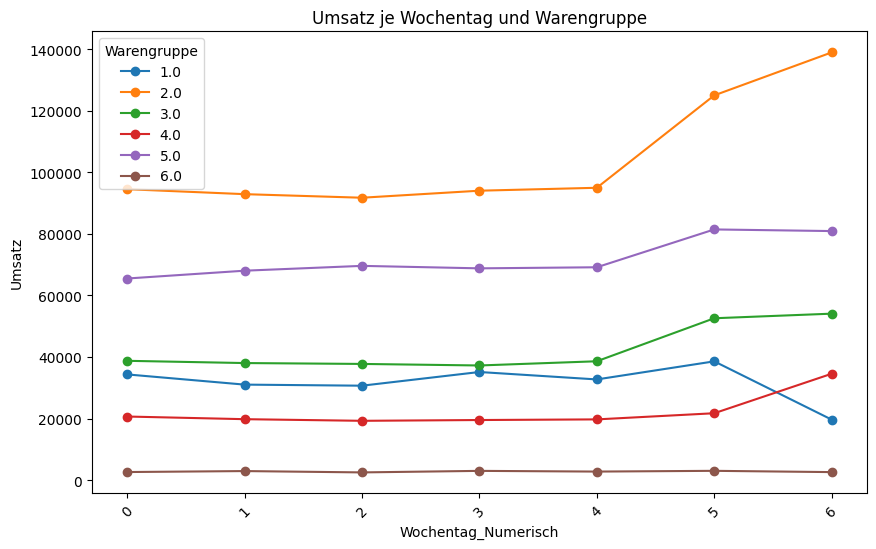

In [6]:
# Erstelle die Visualisierung
plt.figure(figsize=(10, 6))
for warengruppe in umsatz_je_wochentag_warengruppe["Warengruppe"].unique():
    data = umsatz_je_wochentag_warengruppe[umsatz_je_wochentag_warengruppe["Warengruppe"] == warengruppe]
    plt.plot(data["Wochentag_Numerisch"], data["Umsatz"], marker='o', label=warengruppe)

plt.xlabel("Wochentag_Numerisch")
plt.ylabel("Umsatz")
plt.title("Umsatz je Wochentag und Warengruppe")
plt.legend(title="Warengruppe")
plt.xticks(rotation=45)

# Deskriptive Statistiken berechnen

In [7]:
# Temperatur
temp_stats = merged_data['Temperatur'].describe()

# Umsatz
umsatz_stats = merged_data['Umsatz'].describe()

# Wind
wind_stats = merged_data['Windgeschwindigkeit'].describe()

# Umsatz je Warengruppe
deskriptive_statistiken = merged_data.groupby("Warengruppe")["Umsatz"].describe()

## Output deskriptive Statistiken

In [8]:
# Output der Deskriptiven Statistiken
print("Deskriptive Statistiken für Temperatur:")
print(temp_stats)

print("\nDeskriptive Statistiken für Umsatz:")
print(umsatz_stats)

print("\nDeskriptive Statistiken für Windgeschwindigkeit:")
print(wind_stats)

# Ausgabe der deskriptiven Statistiken
print(deskriptive_statistiken)

Deskriptive Statistiken für Temperatur:
count    10103.000000
mean        12.014560
std          7.212466
min        -10.250000
25%          6.250000
50%         11.625000
75%         17.875000
max         32.671428
Name: Temperatur, dtype: float64

Deskriptive Statistiken für Umsatz:
count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64

Deskriptive Statistiken für Windgeschwindigkeit:
count    10103.000000
mean        11.026527
std          4.131774
min          3.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         35.000000
Name: Windgeschwindigkeit, dtype: float64
              count        mean         std         min         25%  \
Warengruppe                                                           
1.0          1819.0  122.142509   40.299209   23.108406   96.436728   
2.0          1819.0  402.497911  139

# Korrelationen berechnen

In [9]:
# Korrelationen berechnen
corr_umsatz_weekend = merged_data['Umsatz'].corr(merged_data['Wochenende'].astype(int))
corr_umsatz_weekday = merged_data.groupby('Wochentag_Numerisch')['Umsatz'].mean()
corr_umsatz_temp = merged_data['Umsatz'].corr(merged_data['Temperatur'])
corr_umsatz_wind = merged_data['Umsatz'].corr(merged_data['Windgeschwindigkeit'])

# Korrelationsmatrix für Umsatzdaten
corr_matrix = merged_data.corr()

# Korrelationen zwischen Umsatz und einzelnen Wochentagen berechnen
corr_umsatz_weekdays = {}
for day in range(7):
    # Filtere den DataFrame nach dem aktuellen Wochentag
    day_data = merged_data[merged_data['Wochentag_Numerisch'] == day]
    # Berechne die Korrelation zwischen Umsatz und dem aktuellen Wochentag
    corr = day_data['Umsatz'].corr(day_data['Wochentag_Numerisch'])
    # Speichere die Korrelation für den aktuellen Wochentag
    corr_umsatz_weekdays[day] = corr

# Ausgabe der Korrelationen für die einzelnen Wochentage
for day, corr in corr_umsatz_weekdays.items():
    print(f"Korrelation zwischen Umsatz und {day}: {corr}")



# Berechne die Kontingenztabelle
kontingenztabelle = pd.crosstab(merged_data["Warengruppe"], merged_data["Wochenende"])

# Berechne Cramér's V
chi2 = stats.chi2_contingency(kontingenztabelle)[0]
n = kontingenztabelle.sum().sum()
min_dim = min(kontingenztabelle.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Optional: Ausgabe der Kontingenztabelle zur Überprüfung
print(kontingenztabelle)

Korrelation zwischen Umsatz und 0: nan
Korrelation zwischen Umsatz und 1: nan
Korrelation zwischen Umsatz und 2: nan
Korrelation zwischen Umsatz und 3: nan
Korrelation zwischen Umsatz und 4: nan
Korrelation zwischen Umsatz und 5: nan
Korrelation zwischen Umsatz und 6: nan
Cramér's V: 0.002742493155364742
Wochenende   False  True 
Warengruppe              
1.0           1298    521
2.0           1298    521
3.0           1298    521
4.0           1255    511
5.0           1298    521
6.0            209     83


/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Lineares Modell

## Lineares Modell 1

In [10]:
mod = smf.ols('Umsatz ~ C(Warengruppe) + Temperatur + Wochenende + KielerWoche  + C(Wochentag_Numerisch)', data=merged_data).fit()

# Print the summary
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.64e-89
Time:                        13:49:59   Log-Likelihood:                -1236.7
No. Observations:                 223   AIC:                             2497.
Df Residuals:                     211   BIC:                             2538.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Lineares Modell 2
Mit Interaktion Wochentag und Umsatz je Warengruppe

In [11]:
# Erstelle eine numerische Darstellung des Wochentags
merged_data["Wochentag_Numerisch"] = merged_data["Datum"].dt.dayofweek

# Baue das Modell, inklusive Interaktionsterm zwischen Warengruppe und Wochentag
mod = smf.ols('Umsatz ~ C(Warengruppe) * C(Wochentag_Numerisch) + Temperatur + Wochenende + KielerWoche', data=merged_data).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     61.86
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           6.62e-85
Time:                        13:50:00   Log-Likelihood:                -1187.9
No. Observations:                 223   AIC:                             2448.
Df Residuals:                     187   BIC:                             2570.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## Lineares Modell 3
Umsatz je Warengruppe und Wochentag und Kieler Woche

In [12]:
# Baue das Modell, inklusive Interaktionstermen zwischen Warengruppe und Wochentag sowie Warengruppe und KielerWoche
mod = smf.ols('Umsatz ~ C(Warengruppe) * C(Wochentag_Numerisch) + Temperatur + Wochenende + C(Warengruppe) * KielerWoche', data=merged_data).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     61.86
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           6.62e-85
Time:                        13:50:00   Log-Likelihood:                -1187.9
No. Observations:                 223   AIC:                             2448.
Df Residuals:                     187   BIC:                             2570.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------